<a href="https://colab.research.google.com/github/Adwait-Naravane/Projects--comp-phy-/blob/Computational-Quantum-mech/ising.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import numba
from numba import jit
from scipy.ndimage import convolve, generate_binary_structure

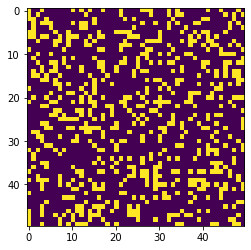

In [ ]:
N = 50
init_random = np.random.random((N,N))
config = np.zeros((N,N))
config[init_random >= 0.75] = 1
config[init_random < 0.75] = -1

plt.imshow(config)

In [ ]:
import copy 
@jit(nopython=True, nogil=True)
def mcmove(config, beta):
  a = np.random.randint(0, N)
  b = np.random.randint(0, N)
  s =  config[a, b]
  nb = config[(a+1)%N,b] + config[a,(b+1)%N] + config[(a-1)%N,b] + config[a,(b-1)%N]
  cost = 2*s*nb
  if cost < 0:
    s *= -1
  elif np.random.random() < np.exp(-cost*beta):
    s *= -1
  config[a, b] = s
  return config

def calcEnergy(config):
    '''Energy of a given configuration (dimensionless)!'''
    energy = 0
    for i in range(len(config)):
        for j in range(len(config)):
            S = config[i,j]
            nb = config[(i+1)%N, j] + config[i,(j+1)%N] + config[(i-1)%N, j] + config[i,(j-1)%N]
            energy += -nb*S
    return energy/4.

def calcMag(config):
    '''Magnetization of a given configuration'''
    mag = np.sum(config)
    return mag
  
def metropolis(config,beta):
  for _ in range(1000000):
    mcmove(config, beta)
  return config

T = np.arange(0.1, 20, 2000)
k = copy.deepcopy(config)
mag = []
for beta in T:
  metropolis(config, beta)
  mag.append(calcMag(config))
  config = k


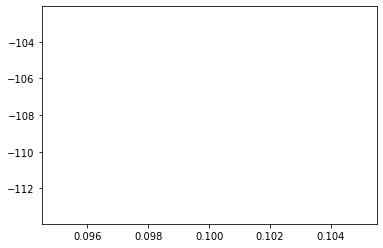

In [ ]:
plt.plot(T, mag)